In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Entertainer.csv'
data = pd.read_csv(file_path)



# Display the first few rows to understand the structure
data.head()


,Entertainer,Gender (traditional),Birth Year,Year of First Oscar/Grammy/Emmy,Breakthrough Name,Year of Breakthrough/#1 Hit/Award Nomination,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2009.0,19,2008,2016,NaN
1,Angelina Jolie,F,1975,1999.0,"Girl, Interrupted",1999,2016,NaN
2,Aretha Franklin,F,1942,1968.0,I Never Loved a Man (The Way I Love You),1967,2014,NaN
3,Bette Davis,F,1908,1935.0,Of Human Bondage,1934,1989,1989.0
4,Betty White,F,1922,1976.0,Life with Elilzabeth,1952,2016,NaN


# Average year of living 


In [8]:
# Filter out the entertainers who have passed away (non-null Year of Death)
deceased_entertainers = data.dropna(subset=['Year of Death'])

# Calculate the age at death
deceased_entertainers['Age at Death'] = deceased_entertainers['Year of Death'] - deceased_entertainers['Birth Year']

# Calculate the average age at death
average_age_at_death = deceased_entertainers['Age at Death'].mean()

print(f"The average age at death is {average_age_at_death:.1f} years.")


The average age at death is 70.7 years.


C:\Users\vivek\AppData\Local\Temp/ipykernel_19056/4202151648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deceased_entertainers['Age at Death'] = deceased_entertainers['Year of Death'] - deceased_entertainers['Birth Year']


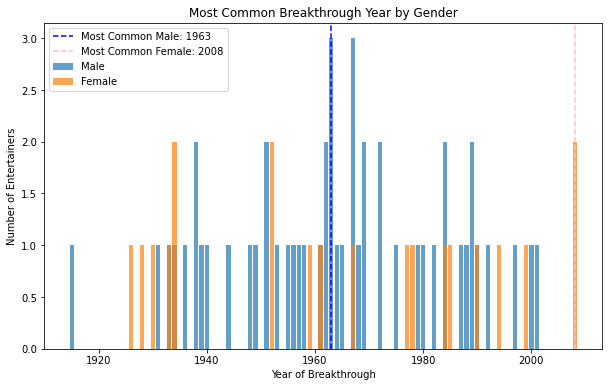

In [10]:
# Separate data by gender
male_entertainers = data[data['Gender (traditional)'] == 'M']
female_entertainers = data[data['Gender (traditional)'] == 'F']

# Find the most common breakthrough year for males
most_common_breakthrough_male = male_entertainers['Year of Breakthrough/#1 Hit/Award Nomination'].value_counts().idxmax()

# Find the most common breakthrough year for females
most_common_breakthrough_female = female_entertainers['Year of Breakthrough/#1 Hit/Award Nomination'].value_counts().idxmax()

# Count the occurrences of breakthrough years for visualization
male_breakthrough_counts = male_entertainers['Year of Breakthrough/#1 Hit/Award Nomination'].value_counts()
female_breakthrough_counts = female_entertainers['Year of Breakthrough/#1 Hit/Award Nomination'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(male_breakthrough_counts.index, male_breakthrough_counts.values, alpha=0.7, label='Male')
plt.bar(female_breakthrough_counts.index, female_breakthrough_counts.values, alpha=0.7, label='Female')

# Highlight the most common breakthrough year for both
plt.axvline(most_common_breakthrough_male, color='blue', linestyle='--', label=f'Most Common Male: {most_common_breakthrough_male}')
plt.axvline(most_common_breakthrough_female, color='pink', linestyle='--', label=f'Most Common Female: {most_common_breakthrough_female}')

plt.xlabel('Year of Breakthrough')
plt.ylabel('Number of Entertainers')
plt.title('Most Common Breakthrough Year by Gender')
plt.legend()
plt.show()


# Common year of breakthrough in Males and Females

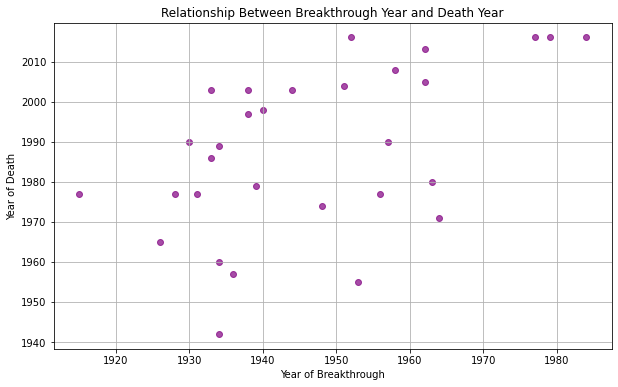

In [11]:
# Filter data where both breakthrough year and death year are available
filtered_data = data.dropna(subset=['Year of Breakthrough/#1 Hit/Award Nomination', 'Year of Death'])

# Extract relevant columns
breakthrough_year = filtered_data['Year of Breakthrough/#1 Hit/Award Nomination']
death_year = filtered_data['Year of Death']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(breakthrough_year, death_year, alpha=0.7, color='purple')

# Add labels and title
plt.xlabel('Year of Breakthrough')
plt.ylabel('Year of Death')
plt.title('Relationship Between Breakthrough Year and Death Year')
plt.grid(True)

# Show the plot
plt.show()


# Gap between breakthrough year and Death year

C:\Users\vivek\AppData\Local\Temp/ipykernel_19056/1798776680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Years After Breakthrough'] = filtered_data['Year of Death'] - filtered_data['Year of Breakthrough/#1 Hit/Award Nomination']


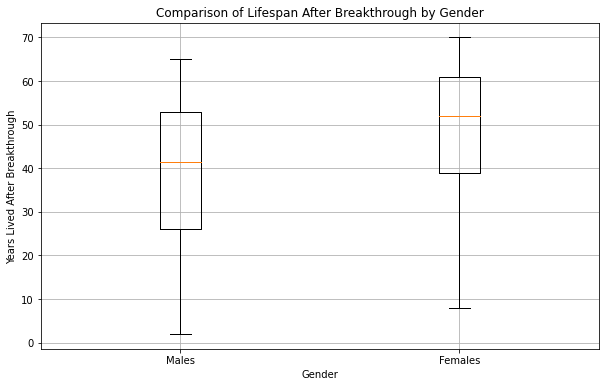

In [12]:
# Filter data where both breakthrough year and death year are available
filtered_data = data.dropna(subset=['Year of Breakthrough/#1 Hit/Award Nomination', 'Year of Death'])

# Calculate years lived after breakthrough
filtered_data['Years After Breakthrough'] = filtered_data['Year of Death'] - filtered_data['Year of Breakthrough/#1 Hit/Award Nomination']

# Separate data by gender
male_lifespan = filtered_data[filtered_data['Gender (traditional)'] == 'M']['Years After Breakthrough']
female_lifespan = filtered_data[filtered_data['Gender (traditional)'] == 'F']['Years After Breakthrough']

# Create a box plot to compare
plt.figure(figsize=(10, 6))
plt.boxplot([male_lifespan.dropna(), female_lifespan.dropna()], labels=['Males', 'Females'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Years Lived After Breakthrough')
plt.title('Comparison of Lifespan After Breakthrough by Gender')
plt.grid(True)

# Show the plot
plt.show()

# who lives more males or females after breakthrough year